### Author: Dr Mike Lakoju, CardiffMet

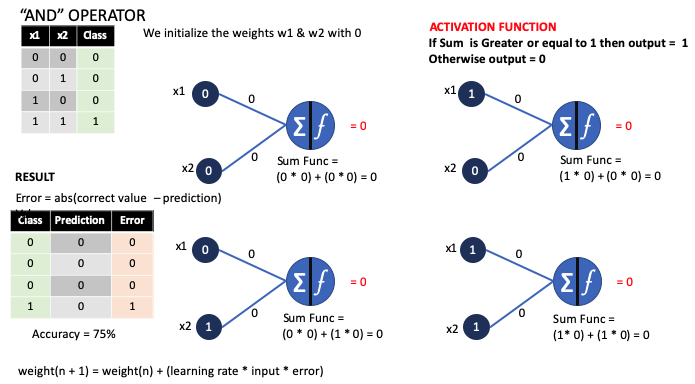

### Import Library

In [1]:
import numpy as np

### Define "Inputs, outputs and weights" as Numpy arrays

#### Inputs

In [2]:
# Creating input values as a matrix not as a vector
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])

In [3]:
# Chcking the shape of the inputs

inputs.shape

(4, 2)

#### Outputs

In [4]:
outputs = np.array([0, 0, 0, 1])

In [5]:
#Checking the shape of the outputs

outputs.shape

(4,)

#### Weights

In [6]:
# one weight for x1 and one for x2  
weights = np.array([0.0, 0.0])

#### Learning Rate

In [7]:
learning_rate = 0.1

## Step function

In [8]:
# This is our Activation function

def step_function(sum):
  if (sum >= 1):
    #print(f'The Sum of Weights is Greater or equal to 1')
    return 1
  else:
        #print(f'The Sum of Weights is NOT > or = to 1')
        return 0

## Process Output

<b>We define a function that allows us to calculate/ process the output. The function accepts an instance of our data, then calculate the sum function using Numpy. Finally, we check the output by passing it through the "Step Function."</b>

In [9]:
def cal_output(instance):
  sum_func = instance.dot(weights)
  return step_function(sum_func)

We pass it as alist in a numpy array ...

In [10]:
cal_output(np.array([[1,1]]))

0

## Train

In [11]:
# Check the number of outputs 

len(outputs)

4

In [12]:
# Checking the index of the input at postion 3 .. 
# this is the last inpute value
inputs[3]

array([1, 1])

In [13]:
inputs

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

<b>Note that:</b> usually, we will need to define the number of epochs, because we will never really get a value of zero when dealing with real-world data. However, for this small data, we will run the loop till we obtain zero error

In [14]:
def train():
    #
    total_error_value = 1
    # While the total_error_value is not equal to zero. we are asumming that at the start of running our network there will be no zero
    while (total_error_value != 0):
        #making the total_error 0 so we can do other calculations
        total_error_value = 0
        #Looping into each row of the dataset (remember indexing in python starts at zero hence 0-3 which are 4 values)
        for i in range(len(outputs)):
            #Calculating predictions
            prediction = cal_output(inputs[i])
            # Calculating the absolute value of the error
            error = abs(outputs[i] - prediction)
            #Updating the error
            total_error_value  += error
            
            if error > 0:
                for j in range(len(weights)):
                    #updating the weights for x1 and x2
                    weights[j] = weights[j] + (learning_rate * inputs[i][j] * error)
                    print('Weight updated to: ' + str(weights[j]))
        print('Total error Value: ' + str(total_error_value))

In [15]:
train()

Weight updated to: 0.1
Weight updated to: 0.1
Total error Value: 1
Weight updated to: 0.2
Weight updated to: 0.2
Total error Value: 1
Weight updated to: 0.30000000000000004
Weight updated to: 0.30000000000000004
Total error Value: 1
Weight updated to: 0.4
Weight updated to: 0.4
Total error Value: 1
Weight updated to: 0.5
Weight updated to: 0.5
Total error Value: 1
Total error Value: 0


## Classification

In [16]:
# Now we have the final weights that will be used to classify new instances of the data after training. 

weights

array([0.5, 0.5])

In [17]:
cal_output(np.array([0,0]))

0

In [18]:
cal_output(np.array([0,1]))

0

In [19]:
cal_output(np.array([1,0]))

0

In [20]:
cal_output(np.array([1,1]))

1